## 이미지 분류 연습문제
 - (1) 데이터 준비
 - (2) 이미지 데이터 전처리 / 시각화
 - (3) 모델링
 - (4) 결과 시각화
 - (5) 모델 저장 / 로드
 - (6) 예측

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1. 데이터 준비

In [2]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
print(X_train[0])
print(y_train[:10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [5]:
print(X_train.min(), X_train.max())
print(y_train.min(), y_train.max())

0 255
0 9


### 2. 이미지 데이터 전처리 / 시각화

In [6]:
s = 0
ls = []
for idx, elt in enumerate(y_train):
    if elt == s:
        ls.append(idx)
        print(elt,'의 인덱스 : ', idx)
        s +=1
    if s == 10:
        break

0 의 인덱스 :  1
1 의 인덱스 :  16
2 의 인덱스 :  27
3 의 인덱스 :  31
4 의 인덱스 :  68
5 의 인덱스 :  82
6 의 인덱스 :  95
7 의 인덱스 :  108
8 의 인덱스 :  109
9 의 인덱스 :  111


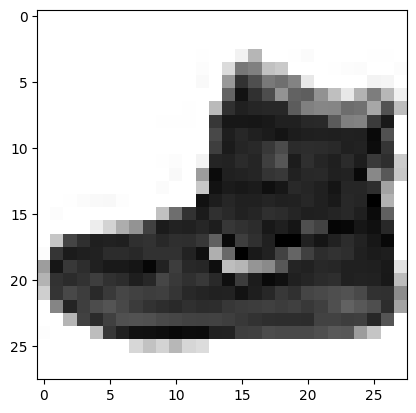

In [7]:
plt.imshow(X_train[0], cmap=plt.cm.binary)

In [8]:
# 길이 28*28=784의 1D tensor로 변환및 0 ~ 1 사이로 스케일링 / pp : preprocessed
X_train_pp = X_train.reshape(60000, 784)/255
X_test_pp = X_test.reshape(10000, 784)/255

In [9]:
# 정답 데이터는 One-Hot 인코딩
from keras.utils import to_categorical
y_train_pp = to_categorical(y_train)
y_test_pp = to_categorical(y_test)

### 3. 모델링

In [10]:
from keras.models import Sequential 
from keras.layers import Dense

In [11]:
# 모델 생성
model_fashion = Sequential()

# 레이어 생성
model_fashion.add(Dense(units=768, input_dim=784, activation='tanh'))
model_fashion.add(Dense(units=10, activation='softmax'))

# 컴파일
model_fashion.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [12]:
# 학습
history = model_fashion.fit(x=X_train_pp, y=y_train_pp,
                    epochs=10, batch_size=4, validation_data=(X_test_pp, y_test_pp))

Epoch 1/10
15000/15000 [==============================] - 16s 1ms/step - loss: 0.6027 - accuracy: 0.7950 - val_loss: 0.5064 - val_accuracy: 0.8235
Epoch 2/10
15000/15000 [==============================] - 16s 1ms/step - loss: 0.5100 - accuracy: 0.8301 - val_loss: 0.4969 - val_accuracy: 0.8320
Epoch 3/10
15000/15000 [==============================] - 16s 1ms/step - loss: 0.4912 - accuracy: 0.8386 - val_loss: 0.5515 - val_accuracy: 0.8165
Epoch 4/10
15000/15000 [==============================] - 16s 1ms/step - loss: 0.4778 - accuracy: 0.8448 - val_loss: 0.6166 - val_accuracy: 0.8214
Epoch 5/10
15000/15000 [==============================] - 16s 1ms/step - loss: 0.4631 - accuracy: 0.8483 - val_loss: 0.4937 - val_accuracy: 0.8372
Epoch 6/10
15000/15000 [==============================] - 16s 1ms/step - loss: 0.4645 - accuracy: 0.8473 - val_loss: 0.4950 - val_accuracy: 0.8429
Epoch 7/10
15000/15000 [==============================] - 16s 1ms/step - loss: 0.4632 - accuracy: 0.8514 - val_loss: 0

### 4. 결과 시각화

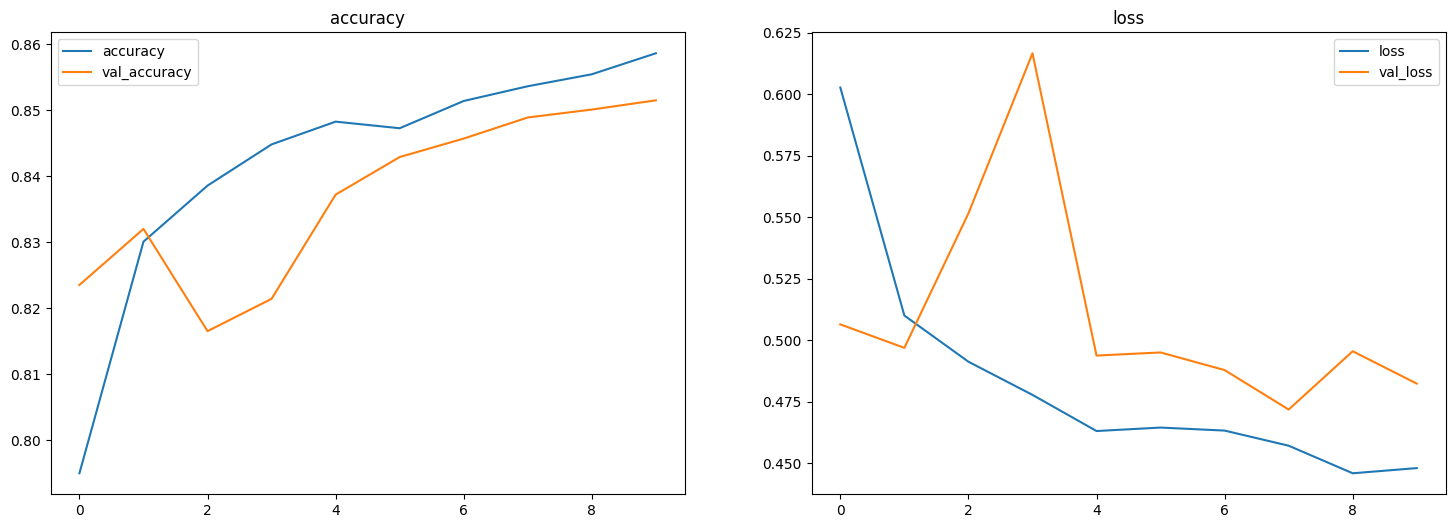

In [13]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('loss')
plt.legend()

plt.show()

### 5. 모델 저장 / 로드

In [14]:
model_fashion.save('../data/model_fashion.keras')

In [15]:
from keras.saving import load_model
loaded_model = load_model('../data/model_fashion.keras')

### 6. 예측

In [16]:
y_test_pp[9]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [17]:
loaded_model.predict(X_test_pp[9].reshape(1, 784))

1/1 [==============================] - 0s 40ms/step


array([[2.6398142e-11, 1.3996022e-09, 4.3053058e-11, 1.1736168e-09,
        2.1457415e-10, 1.8695263e-06, 6.7263825e-12, 9.9969256e-01,
        3.7396903e-09, 3.0549889e-04]], dtype=float32)